In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [13]:
!ls ../theta_stats/d=mnistxkmnist*

'../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-prior=mean_zero_gaussian-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01':
test			train_epoch_13		train_epoch_4_sigma.p
test_mu.p		train_epoch_13_mu.p	train_epoch_5
test_sigma.p		train_epoch_13_sigma.p	train_epoch_5_mu.p
train_epoch_0		train_epoch_14		train_epoch_5_sigma.p
train_epoch_0_mu.p	train_epoch_14_mu.p	train_epoch_6
train_epoch_0_sigma.p	train_epoch_14_sigma.p	train_epoch_6_mu.p
train_epoch_1		train_epoch_1_mu.p	train_epoch_6_sigma.p
train_epoch_10		train_epoch_1_sigma.p	train_epoch_7
train_epoch_10_mu.p	train_epoch_2		train_epoch_7_mu.p
train_epoch_10_sigma.p	train_epoch_2_mu.p	train_epoch_7_sigma.p
train_epoch_11		train_epoch_2_sigma.p	train_epoch_8
train_epoch_11_mu.p	train_epoch_3		train_epoch_8_mu.p
train_epoch_11_sigma.p	train_epoch_3_mu.p	train_epoch_8_sigma.p
train_epoch_12		train_epoch_3_sigma.p	train_epoch_9
train_epoch_12_mu.p	train_epoch_4		train_epoch_9_mu.p
train_epoch_12_sigma.p	train_epoch_4_mu.p	train_

In [14]:
def load_learned_params(path, which): 
    params = pickle.load(open(path + which, 'rb'))
    params = params.reshape((-1, 2))
    return params

def plot_learned_params(params, c='blue'):
    plt.scatter(params[:, 0], params[:, 1], s=1, c=c)
    plt.axis('equal')
    
def plot_params_over_time(params_list, c='blue'):
    nr_plots = len(params_list)
    fig, ax = plt.subplots(1, nr_plots, figsize=(14, 3))
    for i in range(nr_plots):
        params = params_list[i]
        ax[i].scatter(params[:, 0], params[:, 1], s=1, c=c)
        ax[i].axis('equal')
        ax[i].set_xlim([-1, 1])
        ax[i].set_ylim([-1, 1])

## STN

In [15]:
stn_path = '../theta_stats/d=mnistxkmnist-m=stn-b=None-n=1-p=2-kl=None-seed=42-sigmaP=0.1-lr=0.1-lrloc=0.01/'

In [16]:
stn_train_0_mu = load_learned_params(stn_path, 'train_epoch_0_mu.p')
stn_train_1_mu = load_learned_params(stn_path, 'train_epoch_1_mu.p')
stn_train_5_mu = load_learned_params(stn_path, 'train_epoch_5_mu.p')
stn_train_10_mu = load_learned_params(stn_path, 'train_epoch_10_mu.p')
stn_train_14_mu = load_learned_params(stn_path, 'train_epoch_14_mu.p')
stn_test_mu = load_learned_params(stn_path, 'test_mu.p')

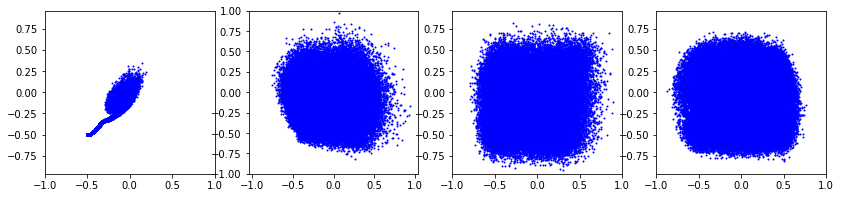

In [17]:
stn_plot_list = [stn_train_0_mu, stn_train_1_mu, stn_train_5_mu, stn_train_10_mu]
plot_params_over_time(stn_plot_list)

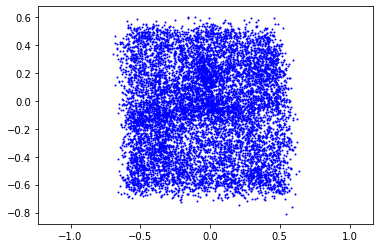

In [18]:
plot_learned_params(stn_test_mu)

## Mean zero Gaussian P-STN

In [19]:
mean_zero_pstn_path= '../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-prior=mean_zero_gaussian-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01/'

In [20]:
pstn_mean_0_train_0_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_0_mu.p')
pstn_mean_0_train_1_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_1_mu.p')
pstn_mean_0_train_5_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_5_mu.p')
pstn_mean_0_train_10_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_10_mu.p')
pstn_mean_0_train_14_mu = load_learned_params(mean_zero_pstn_path, 'train_epoch_14_mu.p')
pstn_mean_0_test_mu = load_learned_params(mean_zero_pstn_path, 'test_mu.p')

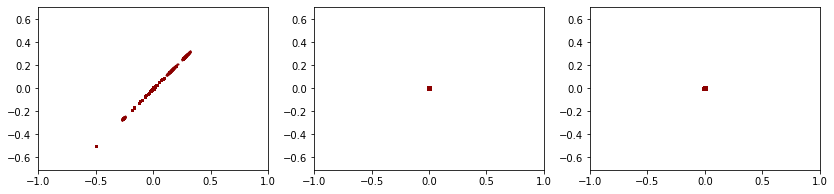

In [21]:
pstn_mean_0_plot_list = [pstn_mean_0_train_0_mu, pstn_mean_0_train_1_mu, pstn_mean_0_train_5_mu]
plot_params_over_time(pstn_mean_0_plot_list, c='darkred')

## P_STN - moving mean

In [22]:
pstn_path = '../theta_stats/d=mnistxkmnist-m=pstn-b=None-n=1-p=2-kl=no_annealing-seed=42-sigmaP=0.05-lr=0.1-lrloc=0.01/'

In [23]:
pstn_train_0_mu = load_learned_params(pstn_path, 'train_epoch_0_mu.p')
pstn_train_1_mu = load_learned_params(pstn_path, 'train_epoch_1_mu.p')
pstn_train_5_mu = load_learned_params(pstn_path, 'train_epoch_5_mu.p')
pstn_train_10_mu = load_learned_params(pstn_path, 'train_epoch_10_mu.p')
pstn_train_14_mu = load_learned_params(pstn_path, 'train_epoch_14_mu.p')
pstn_test_mu = load_learned_params(pstn_path, 'test_mu.p')

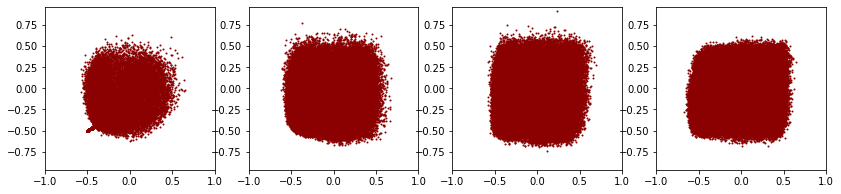

In [24]:
pstn_plot_list = [pstn_train_0_mu, pstn_train_1_mu, pstn_train_5_mu, pstn_train_10_mu]
plot_params_over_time(pstn_plot_list, c='darkred')

# Gaussian mixture prior

In [25]:
stn_train_14_mu

array([[ 0.23630315, -0.07133483],
       [-0.09631936,  0.38402498],
       [-0.33736175, -0.14108261],
       ...,
       [ 0.09027992,  0.46156338],
       [-0.22394253,  0.09692497],
       [ 0.47631663,  0.05727976]], dtype=float32)

In [26]:
from sklearn import mixture

In [69]:
mog = mixture.GaussianMixture(n_components=8, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans')

In [70]:
mog.fit(stn_train_14_mu)

GaussianMixture(n_components=8)

In [71]:
mog.weights_

array([0.12422701, 0.11506008, 0.14861309, 0.11541217, 0.13417384,
       0.16388815, 0.10004253, 0.09858312])

In [72]:
mog.means_

array([[-0.02591279,  0.2884529 ],
       [ 0.37091874, -0.39451838],
       [ 0.07796277, -0.03188831],
       [-0.39380039, -0.42099323],
       [ 0.34481809,  0.20192119],
       [-0.31140763, -0.07310601],
       [-0.024515  , -0.445023  ],
       [-0.40576459,  0.30405596]])

In [73]:
mog.covariances_

array([[[ 0.0173704 ,  0.00349767],
        [ 0.00349767,  0.02278844]],

       [[ 0.01950088,  0.00285374],
        [ 0.00285374,  0.02363772]],

       [[ 0.01963409, -0.00388833],
        [-0.00388833,  0.01395303]],

       [[ 0.01772681,  0.00094658],
        [ 0.00094658,  0.01632187]],

       [[ 0.01533459, -0.00653341],
        [-0.00653341,  0.03117998]],

       [[ 0.02463062,  0.00106012],
        [ 0.00106012,  0.01565711]],

       [[ 0.02294996, -0.00147535],
        [-0.00147535,  0.01609153]],

       [[ 0.02114224,  0.00703932],
        [ 0.00703932,  0.02232761]]])

In [74]:
X

array([[-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ],
       [-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ],
       [-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ],
       ...,
       [-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ],
       [-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ],
       [-1.        , -0.95918367, -0.91836735, ...,  0.91836735,
         0.95918367,  1.        ]])

(-1.0, 1.0, -1.0, 1.0)

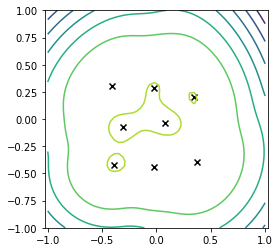

In [75]:
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)

X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
# The distribution on the variables X, Y packed into pos.
XX = np.array([X.ravel(), Y.ravel()]).T
Z = mog.score_samples(XX)
Z = Z.reshape(X.shape)
fig, ax = plt.subplots(1, figsize=(4,4))
ax.contour(X, Y, Z)
ax.scatter(mog.means_[:, 0], mog.means_[:, 1], c='k', marker='x')
ax.axis('equal')


In [102]:
means = torch.Tensor(mog.means_)
covariances = torch.Tensor(mog.covariances_)
weights = torch.Tensor(mog.weights_)

In [103]:
pickle.dump(means, open('../priors/mog_means.p', 'wb'))
pickle.dump(covariances, open('../priors/mog_covariances.p', 'wb'))
pickle.dump(weights, open('../priors/mog_weights.p', 'wb'))

In [104]:
! ls ..

checkpoints  lightning_logs  notebooks	README.md  tests	UQ
data	     loss	     options	scripts    theta_stats	utils
experiments  models	     priors	test.py    train.py


In [105]:
import torch
from torch.distributions import MultivariateNormal, kl

In [106]:
# mockup, use the first component as reference
#means = [torch.Tensor(m) for m in means]
#covariances = [torch.Tensor(c) for c in covariances]
#weights = [torch.Tensor(w) for w in weights]


q = MultivariateNormal(loc=means[0], scale_tril=covariances[0])
kl_loss = 0
for component in range(8):
    p = MultivariateNormal(loc=means[component], scale_tril=covariances[component])
    print(kl.kl_divergence(q, p))
    kl_loss += weights[component] * kl.kl_divergence(q, p)

tensor(-0.0102)
tensor(698.4714)
tensor(245.3594)
tensor(1108.5605)
tensor(295.0863)
tensor(316.2819)
tensor(1038.8759)
tensor(181.6439)
